# Store sales anomlies

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/weekly_sales.csv', parse_dates=['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df.head()

,sales
InvoiceDate,
2010-12-05,2630.31
2010-12-12,2822.51
2010-12-19,2886.73
2010-12-26,417.52
2011-01-02,0.00


<AxesSubplot:xlabel='InvoiceDate'>

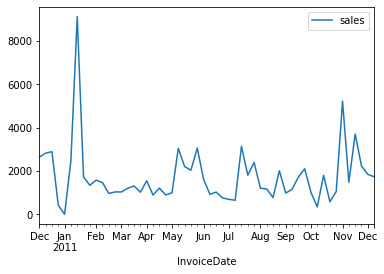

In [3]:
df.plot()

In [4]:
df_weekly = df.copy()
anomaly_detector = IsolationForest(contamination=.1)
df_weekly.loc[:,'anomalies'] = anomaly_detector.fit_predict(df_weekly.values)

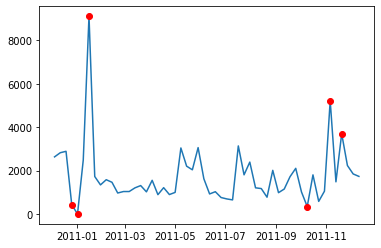

In [5]:
plt.plot(df_weekly.sales)
df_anomaly = df_weekly.query('anomalies==-1')
plt.plot(df_anomaly.sales, 'or')

In [6]:
num_lags = 4

for i in range(num_lags+1):
    df.insert(loc=1, column=f't-{i}' , value=df.iloc[:,0].shift(periods=i))

print(df.head())

               sales      t-4      t-3      t-2      t-1      t-0
InvoiceDate                                                      
2010-12-05   2630.31      NaN      NaN      NaN      NaN  2630.31
2010-12-12   2822.51      NaN      NaN      NaN  2630.31  2822.51
2010-12-19   2886.73      NaN      NaN  2630.31  2822.51  2886.73
2010-12-26    417.52      NaN  2630.31  2822.51  2886.73   417.52
2011-01-02      0.00  2630.31  2822.51  2886.73   417.52     0.00


In [7]:
X = df.iloc[:,1:num_lags+2].dropna()
X.head()

,t-4,t-3,t-2,t-1,t-0
InvoiceDate,,,,,
2011-01-02,2630.31,2822.51,2886.73,417.52,0.00
2011-01-09,2822.51,2886.73,417.52,0.00,2483.74
2011-01-16,2886.73,417.52,0.00,2483.74,9115.76
2011-01-23,417.52,0.00,2483.74,9115.76,1725.00
2011-01-30,0.00,2483.74,9115.76,1725.00,1338.46


In [8]:
# df_weekly_shifted =
anomaly_detector = IsolationForest(contamination=.1)
X.loc[:,'anomalies'] = anomaly_detector.fit_predict(X)
X.head()

/Users/mesmalif/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


,t-4,t-3,t-2,t-1,t-0,anomalies
InvoiceDate,,,,,,
2011-01-02,2630.31,2822.51,2886.73,417.52,0.00,1
2011-01-09,2822.51,2886.73,417.52,0.00,2483.74,1
2011-01-16,2886.73,417.52,0.00,2483.74,9115.76,-1
2011-01-23,417.52,0.00,2483.74,9115.76,1725.00,-1
2011-01-30,0.00,2483.74,9115.76,1725.00,1338.46,-1


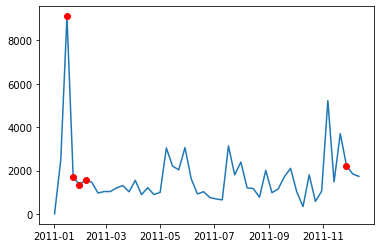

In [9]:
plt.plot(X['t-0'])
df_anomaly = X.query('anomalies==-1')
plt.plot(df_anomaly['t-0'], 'or')